## Tensorflow Softmax Regressions

- Data are stored in pickle by prepare_data sript

### Load packages

In [1]:
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

### Load data

In [2]:
## load data and scalled it
with open('../data/features.pickle', 'rb') as handle:
    d = pickle.load(handle)
    
d['train']['features'][np.isnan(d['train']['features'])] = 0
d['train']['features'] = scale( d['train']['features'], axis=0, with_mean=True, with_std=True, copy=True )

d['validation']['features'][np.isnan(d['validation']['features'])] = 0
d['validation']['features'] = scale( d['validation']['features'], axis=0, with_mean=True, with_std=True, copy=True )


d['test']['features'][np.isnan(d['test']['features'])] = 0
d['test']['features'] =scale(d['test']['features'], axis=0, with_mean=True, with_std=True, copy=True)

## covert into dummy values
d['train']['label'] = pd.get_dummies(d['train']['label']).as_matrix().astype(np.float32)
d['validation']['label'] = pd.get_dummies(d['validation']['label']).as_matrix().astype(np.float32)

d.keys()

['test', 'train', 'validation']

### Define Tensors

In [3]:
## Tensorflow analysis
n_features= d['train']['features'].shape[1]

x = tf.placeholder(dtype=tf.float32,shape=[None,n_features])
y_ = tf.placeholder(dtype=tf.float32,shape=[None,3])

W = tf.Variable(tf.zeros([n_features, 3]))
b = tf.Variable(tf.zeros([3]))

y = tf.nn.softmax(tf.matmul(x, W) + b)

cross_entropy = tf.losses.softmax_cross_entropy(onehot_labels=y_, logits=y)

train_step = tf.train.GradientDescentOptimizer(0.02).minimize(cross_entropy)
sess = tf.Session()                                 # control training and others
sess.run(tf.global_variables_initializer())     

### Tensorflow session running

('Epoch=', 0, '; cross_entropy=', 1.0973778)
('Epoch=', 500, '; cross_entropy=', 0.87417483)
('Epoch=', 1000, '; cross_entropy=', 0.83173865)
('Epoch=', 1500, '; cross_entropy=', 0.81678504)
('Epoch=', 2000, '; cross_entropy=', 0.82366931)
('Epoch=', 2500, '; cross_entropy=', 0.8130635)
('Epoch=', 3000, '; cross_entropy=', 0.81589192)
('Epoch=', 3500, '; cross_entropy=', 0.807374)
('Epoch=', 4000, '; cross_entropy=', 0.80875081)
('Epoch=', 4500, '; cross_entropy=', 0.80634642)
('Epoch=', 5000, '; cross_entropy=', 0.81091022)
('Epoch=', 5500, '; cross_entropy=', 0.80937338)
('Epoch=', 6000, '; cross_entropy=', 0.80537152)
('Epoch=', 6500, '; cross_entropy=', 0.80784386)
('Epoch=', 7000, '; cross_entropy=', 0.79983056)
('Epoch=', 7500, '; cross_entropy=', 0.81050986)
('Epoch=', 8000, '; cross_entropy=', 0.81266779)
('Epoch=', 8500, '; cross_entropy=', 0.79143411)
('Epoch=', 9000, '; cross_entropy=', 0.80321211)
('Epoch=', 9500, '; cross_entropy=', 0.80063528)


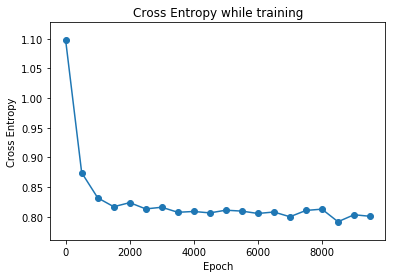

In [4]:
train_size = d['train']['features'].shape[0]

# Parameters
batch_size = 5000 #

tf.set_random_seed(123)

steps=[]
ces = []

## Start train
for step in range(10000):
    # train and net output
    idx = np.random.randint(0,train_size,batch_size)
    batch_xs, batch_ys = d['train']['features'][idx],d['train']['label'][idx]
   
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    
    if step % 500 == 0:
        # plot and show learning process
        ce = sess.run(cross_entropy,feed_dict={x: batch_xs, y_: batch_ys})
        print("Epoch=",step,"; cross_entropy=",ce)
        steps.append(step)
        ces.append(ce)

plt.scatter(steps,ces)
plt.plot(steps,ces)
plt.title("Cross Entropy while training")
plt.xlabel("Epoch")
plt.ylabel("Cross Entropy")
plt.show()

### Accuracy on the validation dataset

In [5]:
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,dtype=tf.float32))
print("Accuracy on Vadlication dataset is :",sess.run(accuracy,feed_dict={x: d['validation']['features'], y_:np.array(d['validation']['label'],dtype=np.float32)}))

('Accuracy on Vadlication dataset is :', 0.74604374)


### Output prediction on the testing dataset to be evaluated by drivendata.org

In [6]:
## Output prediction for test, evalucate it through https://www.drivendata.org/
pred = sess.run(tf.argmax(y,1), feed_dict={x: d['test']['features']})
mapping = dict(enumerate(d['train']['label_original'].cat.categories))
pred_label = [mapping[i] for i in pred ]

outd = pd.DataFrame({"id":d['test']["id"]['id'].tolist(),"status_group": pred_label})

outd.to_csv(path_or_buf="../result/TF-softMax-predctions.csv",index=False)

### Output package versions used

In [7]:
#find the names of the imported modules
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__

#exclude all modules not listed by `!pip freeze`
excludes = ['__builtin__', 'types', 'IPython.core.shadowns', 'sys', 'os']
imported_modules = [module for module in imports() if module not in excludes]
pip_modules = !pip freeze #you could also use `!conda list` with anaconda

#print the names and versions of the imported modules
for module in pip_modules:
    name, version = module.split('==')
    if name in imported_modules:
        print(name + '\t' + version)

numpy	1.13.3
pandas	0.20.3
tensorflow	1.8.0
